## **Projeto de Previsão de Atrasos em Voos No Brasil - EDA**

### Descrição do Projeto



A pontualidade dos voos é um fator crítico para a eficiência operacional do setor aéreo e para a experiência dos passageiros. Atrasos na partida podem gerar efeitos em cascata, impactando conexões, custos operacionais e a percepção de qualidade do serviço.

Este projeto tem como objetivo analisar dados de voos nacionais com foco na identificação de padrões associados a atrasos na partida. **Por meio de Análise Exploratória de Dados (EDA) e técnicas estatísticas, busca-se compreender quais fatores temporais e operacionais influenciam a ocorrência de atrasos, bem como criar e validar variáveis que possam ser utilizadas em modelos de Machine Learning.**

Os insights obtidos nesta etapa servem de base para a construção de um modelo de classificação capaz de estimar, antes da realização do voo, a probabilidade de atraso, apoiando a tomada de decisão operacional e estratégica.


### Objetivos



1.   **Tratamento e exploração de dados (EDA)**: Busca explorar os dados e identificar padrões antes da modelagem e Machine Learning.
2.   **Modelagem Supervisionada:** Usar algoritmo de classificação para identificar se voo é atrasado ou não.
3. **Conclusões:** Apresentação dos insights e as limitações do projeto



### Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configura para mostrar todas as colunas sem truncar
pd.set_option('display.max_columns', None)

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


### Carregamento e Exploração Inicial dos Dados

In [ ]:
# Atribuindo uma variável para cada dataset
vra_2023 = pd.read_parquet('/content/drive/MyDrive/dados_vra/vra_2023.parquet')
vra_2024 = pd.read_parquet('/content/drive/MyDrive/dados_vra/vra_2024.parquet')

In [ ]:
# unindo datasets de 2023 e 2024
vra = pd.concat([vra_2023, vra_2024], ignore_index=True)

In [ ]:
# Ver primeiras entradas do dataset
vra.head()

,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa
0,AAL,0974,0,I,SBGL,KJFK,2023-01-09 23:00:00,None,2023-01-10 09:10:00,None,CANCELADO,NaN
1,AAL,0974,0,I,SBGL,KJFK,2023-01-12 23:00:00,None,2023-01-13 09:10:00,None,CANCELADO,NaN
2,AAL,0974,2,X,SBGL,KJFK,None,2023-01-13 22:59:00,None,2023-01-14 08:24:00,REALIZADO,NaN
3,AAL,0974,0,I,SBGL,KJFK,2023-01-14 23:00:00,None,2023-01-15 09:10:00,None,CANCELADO,NaN
4,AAL,0974,2,X,SBGL,KJFK,None,2023-01-15 22:59:00,None,2023-01-16 08:44:00,REALIZADO,NaN


In [ ]:
# Ver ultimas entradas do dataset
vra.tail()

,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa
1969122,AZU,4606,0,N,SBRF,SBKG,2024-09-29 18:05:00,2024-09-29 18:15:00,2024-09-29 18:55:00,2024-09-29 19:08:00,REALIZADO,NaN
1969123,AZU,4606,0,N,SBRF,SBKG,2024-09-30 19:15:00,2024-09-30 19:29:00,2024-09-30 20:05:00,2024-09-30 20:11:00,REALIZADO,NaN
1969124,AZU,4609,0,N,SBIL,SBCF,2024-09-01 14:30:00,2024-09-01 14:14:00,2024-09-01 15:55:00,2024-09-01 15:37:00,REALIZADO,NaN
1969125,AZU,4609,0,N,SBIL,SBCF,2024-09-02 15:00:00,2024-09-02 14:54:00,2024-09-02 16:25:00,2024-09-02 16:18:00,REALIZADO,NaN
1969126,AZU,4609,0,N,SBIL,SBCF,2024-09-03 15:00:00,2024-09-03 15:03:00,2024-09-03 16:25:00,2024-09-03 16:30:00,REALIZADO,NaN


In [ ]:
# Ver nome das colunas, contagem de linhas e colunas e tipos de dados do dataset
vra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969127 entries, 0 to 1969126
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   icao_empresa_aerea      object 
 1   numero_voo              object 
 2   codigo_autorizacao_di   object 
 3   codigo_tipo_linha       object 
 4   icao_aerodromo_origem   object 
 5   icao_aerodromo_destino  object 
 6   partida_prevista        object 
 7   partida_real            object 
 8   chegada_prevista        object 
 9   chegada_real            object 
 10  situacao_voo            object 
 11  codigo_justificativa    float64
dtypes: float64(1), object(11)
memory usage: 180.3+ MB


In [ ]:
# Total de linhas e colunas
print(f'A tabela possui {vra.shape[0]} linhas e {vra.shape[1]} colunas')

A tabela possui 1969127 linhas e 12 colunas


### Tratamento de Valores Nulos e Duplicados

In [ ]:
# Verificando dados nulos
vra.isnull().sum()

,0
icao_empresa_aerea,0
numero_voo,0
codigo_autorizacao_di,0
codigo_tipo_linha,1
icao_aerodromo_origem,0
icao_aerodromo_destino,0
partida_prevista,66957
partida_real,94993
chegada_prevista,66959
chegada_real,94993


In [ ]:
# Percentual de valores nulos por coluna
vra.isnull().mean() * 100

,0
icao_empresa_aerea,0.000000
numero_voo,0.000000
codigo_autorizacao_di,0.000000
codigo_tipo_linha,0.000051
icao_aerodromo_origem,0.000000
icao_aerodromo_destino,0.000000
partida_prevista,3.400339
partida_real,4.824117
chegada_prevista,3.400441
chegada_real,4.824117


* Optou-se pela remoção das linhas com valores nulos, uma vez que o percentual máximo de ausência era inferior a 5%, não comprometendo a representatividade do dataset.

* Optou-se por excluir a coluna `codigo_justificativa` por ter 100% de seus valores nulos.

In [ ]:
# Removendo primeiro a coluna codigo_justificativa

vra = vra.drop(columns=['codigo_justificativa'])


In [ ]:
# Verificando dataset apos exclusão da coluna codigo_justificativa
vra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969127 entries, 0 to 1969126
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   icao_empresa_aerea      object
 1   numero_voo              object
 2   codigo_autorizacao_di   object
 3   codigo_tipo_linha       object
 4   icao_aerodromo_origem   object
 5   icao_aerodromo_destino  object
 6   partida_prevista        object
 7   partida_real            object
 8   chegada_prevista        object
 9   chegada_real            object
 10  situacao_voo            object
dtypes: object(11)
memory usage: 165.3+ MB


In [ ]:
# remover todas as linhas com qualquer nulo

vra = vra.dropna()

In [ ]:
# Validar o resultado após exclusão dos valores nulos
vra.isnull().mean() * 100



,0
icao_empresa_aerea,0.0
numero_voo,0.0
codigo_autorizacao_di,0.0
codigo_tipo_linha,0.0
icao_aerodromo_origem,0.0
icao_aerodromo_destino,0.0
partida_prevista,0.0
partida_real,0.0
chegada_prevista,0.0
chegada_real,0.0


In [ ]:
# Verificar se há dados duplicados na tabela
vra.duplicated().sum()

np.int64(0)

* Não há valores duplicados

### Tratamento de colunas de Data/Hora

Convertendo as colunas relacionadas a 'partida' e 'chegada' para o formato datetime, usando `pd.to_datetime` e `errors='coerce'` para lidar com valores inválidos.

In [ ]:
date_columns = ['partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real']
for col in date_columns:
    vra[col] = pd.to_datetime(vra[col], errors='coerce')

vra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1807177 entries, 21 to 1969126
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   icao_empresa_aerea      object        
 1   numero_voo              object        
 2   codigo_autorizacao_di   object        
 3   codigo_tipo_linha       object        
 4   icao_aerodromo_origem   object        
 5   icao_aerodromo_destino  object        
 6   partida_prevista        datetime64[ns]
 7   partida_real            datetime64[ns]
 8   chegada_prevista        datetime64[ns]
 9   chegada_real            datetime64[ns]
 10  situacao_voo            object        
dtypes: datetime64[ns](4), object(7)
memory usage: 165.5+ MB


## Análise Exploratória de Dados (EDA)

Essa seção fornece uma visão detalhada da estrutura e do siginificado dos dados que serão analisados.

#### Aplicação de regras de negócio

Para que fosse possível a aplicação de um MVP decidimos filtrar algumas características que serão aplicadas a partir deste momento no dataset. Essas regras são:
* O treinamento será feito somente com voos nacionais(N).
* O treinamento será realizado somente para voo na modalidade 0 (Voos regulares e comerciais)

### Análise univariada da coluna codigo_tipo_linha

A coluna **codigo_tipo_linha** descreve a natureza geográfica e o regime da operação do voo. Esses códigos são essenciais para segmentar voos domésticos de internacionais em seu modelo de previsão.

Significados dos Códigos

* **N (Nacional):** Identifica voos domésticos operados por empresas brasileiraentre dois aeroportos dentro do território nacional.
---

* **I (Internacional):** Identifica voos internacionais operados por empresabrasileiras ou estrangeiras que conectam o Brasil a outro país ovice-versa.
---

* **X (Internacional Regional):** Refere-se a voos internacionais realizadodentro da região (geralmente voos para países da América do Sul ou  vizinhos), tratados com especificidades tarifárias ou de acordos regionais.
---
* **G (Internacional Cargueiro):** Identifica voos internacionais exclusivamentvoltados ao transporte de carga.
---
* **C (Nacional Cargueiro):** Identifica voos domésticos exclusivamente voltadoao transporte de carga.

---

In [ ]:
# Quantidade em proporção de voos por codigo_tipo_linha

vra["codigo_tipo_linha"].value_counts(normalize=True)

,proportion
codigo_tipo_linha,
N,0.835203
I,0.130321
C,0.020006
G,0.014468
X,0.000002


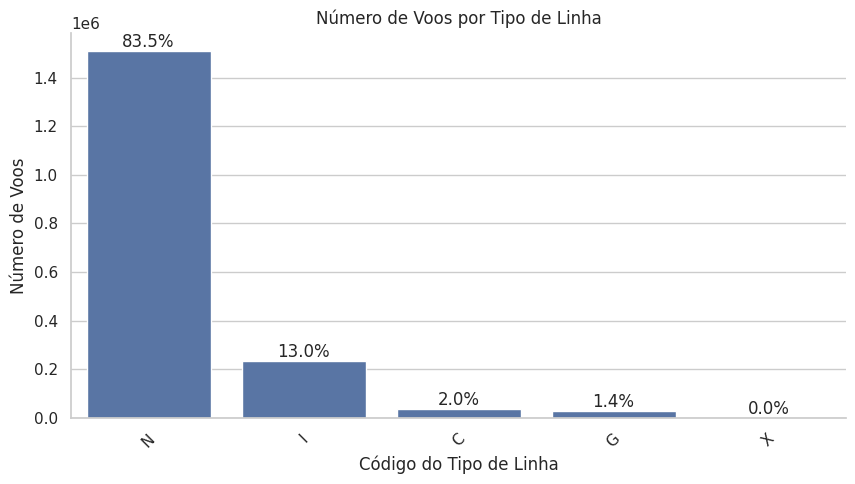

In [ ]:
# Visualizando os dados da coluna

# Contagem absoluta
contagem_tipo_linha = vra["codigo_tipo_linha"].value_counts().reset_index()
contagem_tipo_linha.columns = ["codigo_tipo_linha", "quantidade"]

# Percentual
total = contagem_tipo_linha["quantidade"].sum()
contagem_tipo_linha["percentual"] = (contagem_tipo_linha["quantidade"] / total) * 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=contagem_tipo_linha,
    x="codigo_tipo_linha",
    y="quantidade"
)

# Títulos e rótulos
ax.set_title("Número de Voos por Tipo de Linha")
ax.set_xlabel("Código do Tipo de Linha")
ax.set_ylabel("Número de Voos")
plt.xticks(rotation=45)

# Remover linhas superior e direita (e opcionalmente esquerda)
sns.despine(top=True, right=True)

# Adicionar porcentagem nas barras
for index, row in contagem_tipo_linha.iterrows():
    ax.text(
        index,
        row["quantidade"],
        f'{row["percentual"]:.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()



* É possível observar que cerca de 83,5% dos dados são de voos nacionais. Dito isso, conforme regra de negócio, será criado novo dataset onde contenha aprnas voos nacionais.

#### Filtrando dados de voos nacionais

In [ ]:
# criando dataframe de voos nacionais
vra_nacional = vra[vra['codigo_tipo_linha'] == 'N']

# Validando transformações antes vs depois
print(f"Shape do DataFrame original: {vra.shape}")
print(f"Shape do DataFrame filtrado: {vra_nacional.shape}")
display(vra_nacional.head())

Shape do DataFrame original: (1807177, 11)
Shape do DataFrame filtrado: (1509359, 11)


,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo
104,AZU,2914,0,N,SBGR,SBCY,2023-01-17 12:40:00,2023-01-17 13:05:00,2023-01-17 14:55:00,2023-01-17 15:03:00,REALIZADO
209,AZU,2600,0,N,SBCT,SBFI,2023-01-09 07:55:00,2023-01-09 07:51:00,2023-01-09 09:10:00,2023-01-09 09:04:00,REALIZADO
210,AZU,2600,0,N,SBCT,SBFI,2023-01-10 11:00:00,2023-01-10 11:05:00,2023-01-10 12:15:00,2023-01-10 12:26:00,REALIZADO
211,AZU,2600,0,N,SBCT,SBFI,2023-01-11 07:55:00,2023-01-11 07:55:00,2023-01-11 09:10:00,2023-01-11 09:08:00,REALIZADO
212,AZU,2600,0,N,SBCT,SBFI,2023-01-12 07:55:00,2023-01-12 08:44:00,2023-01-12 09:10:00,2023-01-12 09:49:00,REALIZADO


In [ ]:
# Validando após transformação
vra_nacional['codigo_tipo_linha'].unique()

array(['N'], dtype=object)

### Análise univariada da coluna **codigo_autorizacao_di**


O DI, um caractere numérico, serve para categorizar o motivo ou modalidade da operação de um trecho de voo (ex: é regular? é fretado? é de instrução?), sendo fundamental para a organização e estatística da aviação civil no Brasil, conforme as normas da ANAC.

    0 (Zero): Para voos regulares (comerciais de linha).
    1 (Um): Para voos fretados (charter).
    2 (Dois): Para voos de instrução.
    3 (Três): Para voos de táxi aéreo.
    4 (Quatro): Para voos de pulverização agrícola (ou outros tipos específicos de operações agrícolas).
    5 (Cinco): Para voos de reboque de planadores.
    6 (Seis): Para voos de reboque de banners (publicitários).
    7 (Sete): Para voos de fotografia ou filmagem aérea.
    8 (Oito): Para voos de táxi-aéreo (pode variar, mas é um tipo).
    9 (Nove): Para voos de transporte de carga ou correio (quando não é parte de voo regular).

Além disso as vezes pode conter:

* **Letra D (Duplicata/Diferenciada):** Frequentemente associada a etapas que sofreram alterações operacionais no sistema ou que representam voos duplicados para fins de ajuste de malha. Se o seu modelo foca em passageiros reais, registros com "D" muitas vezes precisam ser filtrados ou tratados como ruído, pois podem não representar um voo físico único, mas uma correção sistêmica.

* **Letra E (Especial/Extraoficial):** Refere-se a etapas não remuneradas que transportam objetos ou logística técnica (como reposicionamento de aeronaves). Esses voos não seguem o rigor dos horários comerciais de passageiros e costumam ter padrões de atraso completamente diferentes dos voos regulares (Código 0).



In [ ]:
# Quantidade em proporção de voos por codigo_autorizacao_di

vra["codigo_autorizacao_di"].value_counts(normalize=True)

,proportion
codigo_autorizacao_di,
0,0.992764
9,0.003692
7,0.002451
2,0.000837
4,0.000110
6,0.000074
1,0.000066
E,0.000007


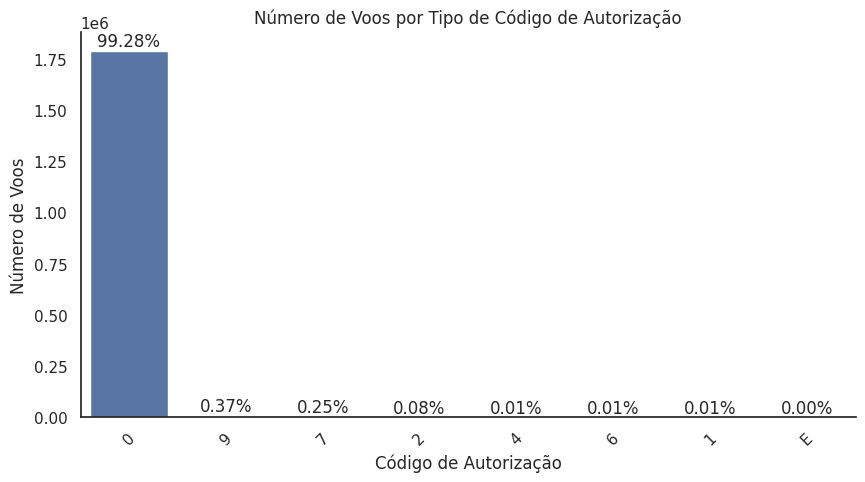

In [ ]:
# Código de visualização

# Remover linhas de fundo (grid)
sns.set_style("white")

# Contagem absoluta
contagem_codigos = vra["codigo_autorizacao_di"].value_counts().reset_index()
contagem_codigos.columns = ["codigo_autorizacao_di", "quantidade"]

# Percentual
total = contagem_codigos["quantidade"].sum()
contagem_codigos["percentual"] = (contagem_codigos["quantidade"] / total) * 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=contagem_codigos,
    x="codigo_autorizacao_di",
    y="quantidade"
)

# Títulos e rótulos
ax.set_title("Número de Voos por Tipo de Código de Autorização")
ax.set_xlabel("Código de Autorização")
ax.set_ylabel("Número de Voos")
plt.xticks(rotation=45)

# Remover linhas superior e direita
sns.despine(top=True, right=True)

# Adicionar porcentagem nas barras
for index, row in contagem_codigos.iterrows():
    ax.text(
        index,
        row["quantidade"],
        f'{row["percentual"]:.2f}%',
        ha='center',
        va='bottom'
    )

plt.show()

* Com base nos dados é possível perceber que mais de 99% dos voos são do tipo 0 ou seja, voos regulares e comerciais o que pensando no objetivo do projeto, é o tipo ideal para modelagem e machine learning.

### Filtrando somente voos com código de autorização 0

In [ ]:
# criando dataframe de voos nacionais E codigo de autorização para voos regulares(0)
vra_nacional = vra_nacional[vra_nacional['codigo_autorizacao_di'] == '0']


# Validando transformações antes vs depois
print(f"Shape do DataFrame original: {vra.shape}")
print(f"Shape do DataFrame filtrado por código de autorização: {vra_nacional.shape}")
display(vra_nacional.head())

Shape do DataFrame original: (1807177, 11)
Shape do DataFrame filtrado por código de autorização: (1499434, 11)


,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo
104,AZU,2914,0,N,SBGR,SBCY,2023-01-17 12:40:00,2023-01-17 13:05:00,2023-01-17 14:55:00,2023-01-17 15:03:00,REALIZADO
209,AZU,2600,0,N,SBCT,SBFI,2023-01-09 07:55:00,2023-01-09 07:51:00,2023-01-09 09:10:00,2023-01-09 09:04:00,REALIZADO
210,AZU,2600,0,N,SBCT,SBFI,2023-01-10 11:00:00,2023-01-10 11:05:00,2023-01-10 12:15:00,2023-01-10 12:26:00,REALIZADO
211,AZU,2600,0,N,SBCT,SBFI,2023-01-11 07:55:00,2023-01-11 07:55:00,2023-01-11 09:10:00,2023-01-11 09:08:00,REALIZADO
212,AZU,2600,0,N,SBCT,SBFI,2023-01-12 07:55:00,2023-01-12 08:44:00,2023-01-12 09:10:00,2023-01-12 09:49:00,REALIZADO


In [ ]:
# Validação após transformação
vra_nacional['codigo_autorizacao_di'].unique()

array(['0'], dtype=object)

In [ ]:
# Salva checkpoint
vra_nacional.to_parquet("vra_nacional.parquet", index=False)

### Análise univariada da coluna **situacao_voo**

In [ ]:
# Listando valores da coluna situacao_voo

vra_nacional['situacao_voo'].unique()

array(['REALIZADO'], dtype=object)

### Análise da coluna **icao_aerodromo_origem**

In [ ]:
# Verificando a quantidade de aerodromos dos voos de origem somente nacionais

vra_nacional["icao_aerodromo_origem"].nunique()

178

#### **Top 10 aeroportos de origem com mais voos**

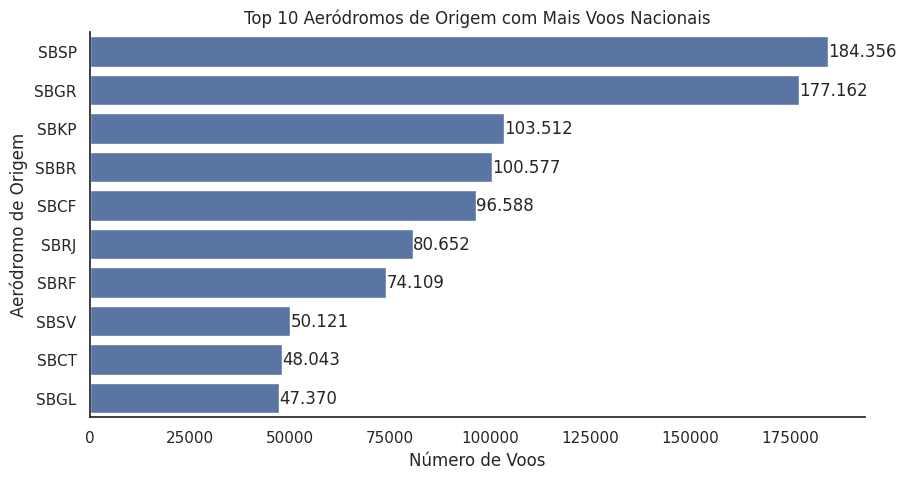

In [ ]:
# Estilo sem grid
sns.set_style("white")

# Contagem dos aeródromos de origem (Top 10)
top10_origem = (
    vra_nacional["icao_aerodromo_origem"]
    .value_counts()
    .head(10)
    .reset_index()
)

top10_origem.columns = ["icao_aerodromo_origem", "quantidade"]

# Plot horizontal
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top10_origem,
    x="quantidade",
    y="icao_aerodromo_origem"
)

# Títulos e rótulos
ax.set_title("Top 10 Aeródromos de Origem com Mais Voos Nacionais")
ax.set_xlabel("Número de Voos")
ax.set_ylabel("Aeródromo de Origem")

# Remover bordas superior e direita
sns.despine(top=True, right=True)

# Adicionar rótulos de quantidade nas barras
for index, row in top10_origem.iterrows():
    ax.text(
        row["quantidade"],
        index,
        f'{row["quantidade"]:,}'.replace(',', '.'),
        va='center',
        ha='left'
    )

plt.show()


#### **Pareto (percentual acumulado) – Aeródromos de origem**

In [ ]:
# Contagem de voos por aeródromo de origem
pareto_origem = (
    vra_nacional["icao_aerodromo_origem"]
    .value_counts()
    .reset_index()
)

pareto_origem.columns = ["icao_aerodromo_origem", "quantidade"]

# Percentual e percentual acumulado
total_voos = pareto_origem["quantidade"].sum()

pareto_origem["percentual"] = (pareto_origem["quantidade"] / total_voos) * 100
pareto_origem["percentual_acumulado"] = pareto_origem["percentual"].cumsum()


In [ ]:
# Ver rapidamente o Pareto (top aeródromos)
pareto_origem.head(19)

,icao_aerodromo_origem,quantidade,percentual,percentual_acumulado
0,SBSP,184356,12.295039,12.295039
1,SBGR,177162,11.815258,24.110298
2,SBKP,103512,6.903405,31.013703
3,SBBR,100577,6.707664,37.721367
4,SBCF,96588,6.441631,44.162998
5,SBRJ,80652,5.378830,49.541827
6,SBRF,74109,4.942465,54.484292
7,SBSV,50121,3.342661,57.826953
8,SBCT,48043,3.204076,61.031029
9,SBGL,47370,3.159192,64.190221


#### Quantos aeródromos concentram X% dos voos de origem?

In [ ]:
# Quantos aerodromos concentram 80% dos voos de origem
pareto_origem[pareto_origem["percentual_acumulado"] <= 80].shape[0]

18

Aplicando a regra de pareto podemos entender de onde saem 80% dos voos:

* 18 aeródromos

* Representam ≈ 80,07% de todos os voos de origem

* Em um universo de 178 aeródromos

Ou seja: ~10% dos aeródromos concentram ~80% da operação nacional de saída

Além de, aeroportos com maior movimentação de voos sofrem com uma maior possibilidade de atrasos.


### Análise da coluna **icao_aerodromo_destino**

In [ ]:
# Verificando a quantidade de aerodromos dos voos de destino
vra_nacional["icao_aerodromo_destino"].nunique()

180

#### **Top 10 aeroportos de destino com mais voos**

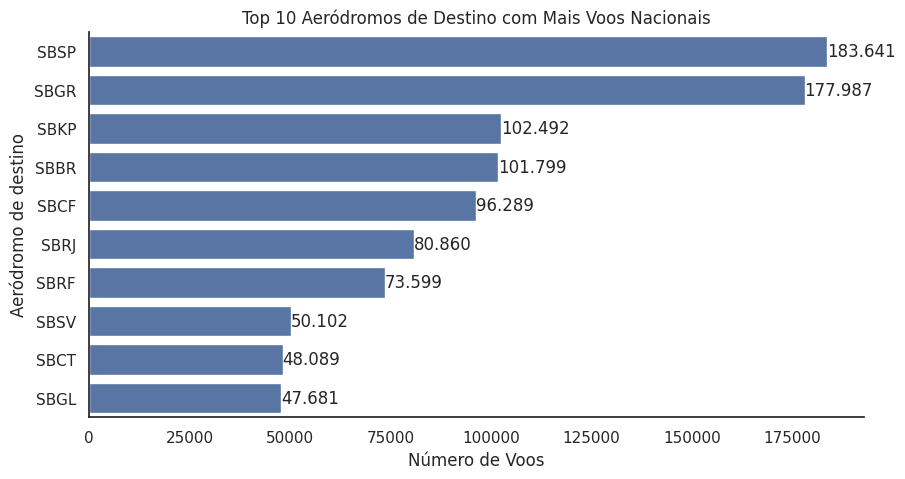

In [ ]:
# Estilo sem grid
sns.set_style("white")

# Contagem dos aeródromos de origem (Top 10)
top10_origem = (
    vra_nacional["icao_aerodromo_destino"]
    .value_counts()
    .head(10)
    .reset_index()
)

top10_origem.columns = ["icao_aerodromo_destino", "quantidade"]

# Plot horizontal
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top10_origem,
    x="quantidade",
    y="icao_aerodromo_destino"
)

# Títulos e rótulos
ax.set_title("Top 10 Aeródromos de Destino com Mais Voos Nacionais")
ax.set_xlabel("Número de Voos")
ax.set_ylabel("Aeródromo de destino")

# Remover bordas superior e direita
sns.despine(top=True, right=True)

# Adicionar rótulos de quantidade nas barras
for index, row in top10_origem.iterrows():
    ax.text(
        row["quantidade"],
        index,
        f'{row["quantidade"]:,}'.replace(',', '.'),
        va='center',
        ha='left'
    )

plt.show()


#### **Pareto de DESTINO Contagem + percentual acumulado**

In [ ]:
# Contagem de voos por aeródromo de destino
pareto_destino = (
    vra_nacional["icao_aerodromo_destino"]
    .value_counts()
    .reset_index()
)

pareto_destino.columns = ["icao_aerodromo_destino", "quantidade"]

# Percentual e percentual acumulado
total_voos = pareto_destino["quantidade"].sum()

pareto_destino["percentual"] = (pareto_destino["quantidade"] / total_voos) * 100
pareto_destino["percentual_acumulado"] = pareto_destino["percentual"].cumsum()


In [ ]:
# Ver rapidamente o Pareto (top aeródromos DESTINO)
pareto_destino.head(19)

,icao_aerodromo_destino,quantidade,percentual,percentual_acumulado
0,SBSP,183641,12.247355,12.247355
1,SBGR,177987,11.870279,24.117634
2,SBKP,102492,6.835379,30.953013
3,SBBR,101799,6.789162,37.742175
4,SBCF,96289,6.421690,44.163864
5,SBRJ,80860,5.392702,49.556566
6,SBRF,73599,4.908452,54.465018
7,SBSV,50102,3.341394,57.806412
8,SBCT,48089,3.207143,61.013556
9,SBGL,47681,3.179933,64.193489


É possível notar que:

* Os mesmos ~18 aeródromos

* Concentrando ≈ 80% dos voos

* Com percentuais quase idênticos aos de ORIGEM

Ou seja,  

* A malha aérea nacional é altamente concentrada e praticamente simétrica entre origem e destino.

Isso pode reforçar:

* centralização operacional

* risco sistêmico (atrasos se propagam)

A aplicação da análise de Pareto aos aeródromos de origem e destino mostrou que aproximadamente 80% da operação nacional está concentrada nos mesmos 18 aeroportos, evidenciando uma malha aérea altamente centralizada e simétrica.

Pensando em features para o modelo, poderiamos criar duas features booleanas:  

"origem_top80" - Que indentificaria os aeroportos de origem que fazem parte desse range.

"destino_top80" - Que indentificaria os aeroportos de destino que fazem parte desse range.

Desta forma o modelo aprende SE chegar ou SE sair ou mesmo a combinação desses hubs haveria maior possibilidade de atrasos

### Análise da coluna **icao_empresa_aerea**

In [ ]:
# Verificando a quantidade de empresas aéreas na base

vra_nacional['icao_empresa_aerea'].nunique()

9

In [ ]:
vra_nacional["icao_empresa_aerea"].value_counts().head(10)


,count
icao_empresa_aerea,
AZU,559594
TAM,471982
GLO,398437
ACN,34051
PTB,30350
PAM,3233
ABJ,1593
CQB,191
SID,3


In [ ]:
# Criando dataframe a partir da contagem
df_pareto_cia = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .reset_index()
)

df_pareto_cia.columns = ["icao_empresa_aerea", "quantidade"]

# Percentuais
total = df_pareto_cia["quantidade"].sum()

df_pareto_cia["percentual"] = df_pareto_cia["quantidade"] / total * 100
df_pareto_cia["percentual_acumulado"] = df_pareto_cia["percentual"].cumsum()

df_pareto_cia


,icao_empresa_aerea,quantidade,percentual,percentual_acumulado
0,AZU,559594,37.320349,37.320349
1,TAM,471982,31.477344,68.797693
2,GLO,398437,26.572493,95.370186
3,ACN,34051,2.270924,97.641110
4,PTB,30350,2.024097,99.665207
5,PAM,3233,0.215615,99.880822
6,ABJ,1593,0.106240,99.987062
7,CQB,191,0.012738,99.999800
8,SID,3,0.000200,100.000000


É possível perceber que:

* As cias AZU + TAM + GLO detem + de 95% operação

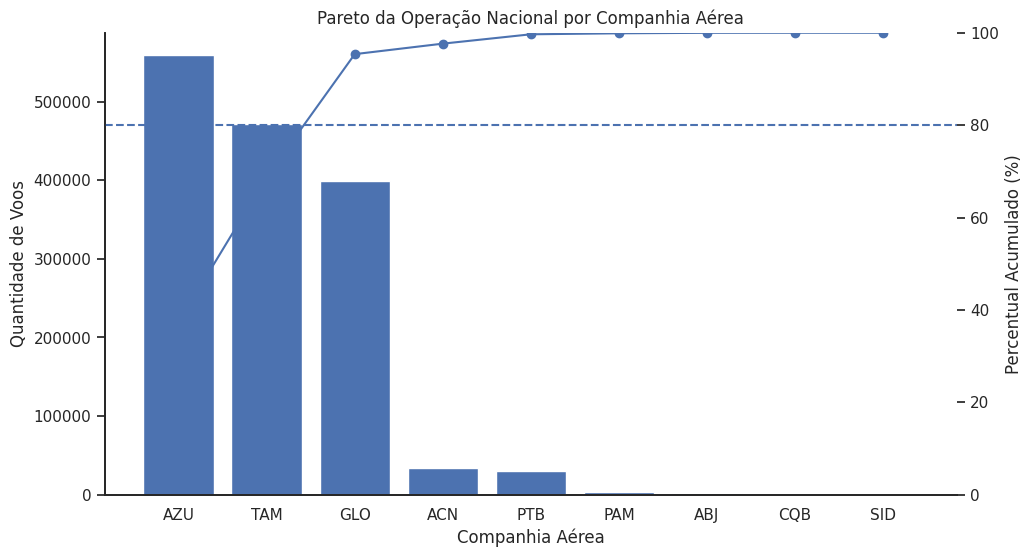

In [ ]:
fig, ax1 = plt.subplots(figsize=(11, 6))

# Barras — quantidade
ax1.bar(
    df_pareto_cia["icao_empresa_aerea"],
    df_pareto_cia["quantidade"]
)
ax1.set_xlabel("Companhia Aérea")
ax1.set_ylabel("Quantidade de Voos")

# Eixo secundário — percentual acumulado
ax2 = ax1.twinx()
ax2.plot(
    df_pareto_cia["icao_empresa_aerea"],
    df_pareto_cia["percentual_acumulado"],
    marker="o"
)
ax2.set_ylabel("Percentual Acumulado (%)")
ax2.set_ylim(0, 100)

# Linha de referência dos 80%
ax2.axhline(80, linestyle="--")

# Remover bordas superior e direita
sns.despine(top=True, right=True)

plt.title("Pareto da Operação Nacional por Companhia Aérea")
plt.show()


#### Gráfico de barras (contagem de ocorrências)


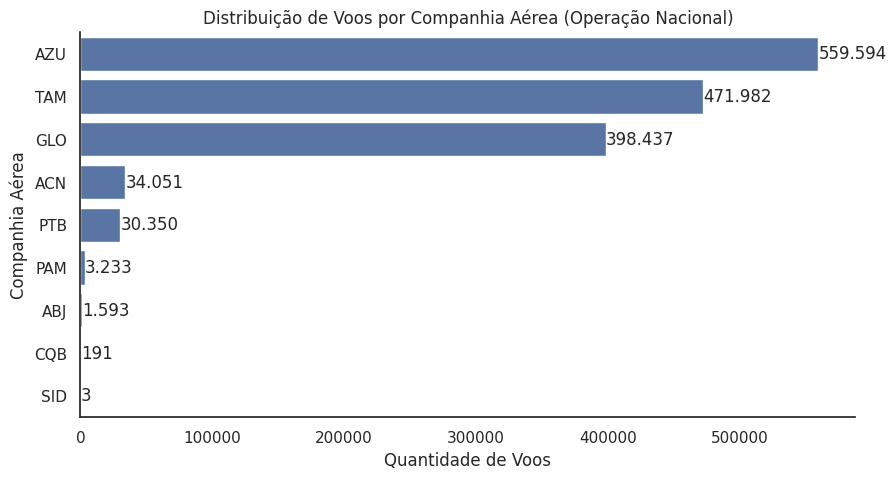

In [ ]:
sns.set_style("white")

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=df_pareto_cia,
    x="quantidade",
    y="icao_empresa_aerea"
)

ax.set_title("Distribuição de Voos por Companhia Aérea (Operação Nacional)")
ax.set_xlabel("Quantidade de Voos")
ax.set_ylabel("Companhia Aérea")

# Rótulos
for i, v in enumerate(df_pareto_cia["quantidade"]):
    ax.text(v, i, f"{v:,}".replace(",", "."), va="center", ha="left")

sns.despine(top=True, right=True)
plt.show()

Ressaltando que:

Somando as três maiores:

* AZU: 559.594

* TAM: 471.982

* GLO: 398.437

Total dessas 3 ≈ 1.430.013 voos

A operação aérea nacional apresenta altíssima concentração, onde **apenas 3 companhias (AZU, TAM e GLO) são responsáveis por mais de 95% dos voos comerciais**. Isso indica que a dinâmica operacional do sistema é fortemente dominada por essas empresas, **tornando a variável companhia aérea altamente relevante para a modelagem de atraso de voos**.

* Ações que podem ser consideradas posteriormente com base nesses dados:

As companhias menores podem:

* ser agrupadas como “Outras”

* ou até removidas se estatisticamente irrelevantes

### Criação de Features e Target "Atraso"

#### **Calcular Tempo de Voo Estimado**

Calculando a diferença entre `chegada_prevista` e `partida_prevista` para obter o tempo de voo estimado em horas.

In [ ]:
vra_nacional['tempo_voo_estimado'] = (vra_nacional['chegada_prevista'] - vra_nacional['partida_prevista']).dt.total_seconds() / 3600
display(vra_nacional[['partida_prevista', 'chegada_prevista', 'tempo_voo_estimado']].head())

,partida_prevista,chegada_prevista,tempo_voo_estimado
104,2023-01-17 12:40:00,2023-01-17 14:55:00,2.25
209,2023-01-09 07:55:00,2023-01-09 09:10:00,1.25
210,2023-01-10 11:00:00,2023-01-10 12:15:00,1.25
211,2023-01-11 07:55:00,2023-01-11 09:10:00,1.25
212,2023-01-12 07:55:00,2023-01-12 09:10:00,1.25


#### **Calcular Tempo de Voo Real**
Calculando a diferença entre `chegada_real` e `partida_real` para obter o tempo de voo real em horas.

In [ ]:
vra_nacional['tempo_voo_real'] = (vra_nacional['chegada_real'] - vra_nacional['partida_real']).dt.total_seconds() / 3600
display(vra_nacional[['partida_real', 'chegada_real', 'tempo_voo_real']].head())

,partida_real,chegada_real,tempo_voo_real
104,2023-01-17 13:05:00,2023-01-17 15:03:00,1.966667
209,2023-01-09 07:51:00,2023-01-09 09:04:00,1.216667
210,2023-01-10 11:05:00,2023-01-10 12:26:00,1.350000
211,2023-01-11 07:55:00,2023-01-11 09:08:00,1.216667
212,2023-01-12 08:44:00,2023-01-12 09:49:00,1.083333


#### **Calcular Diferença de Previsão vs. Real**

Calculando a diferença entre o tempo de voo real e o estimado em horas.

In [ ]:
vra_nacional['diferenca_previsao_real'] = vra_nacional['tempo_voo_real'] - vra_nacional['tempo_voo_estimado']
display(vra_nacional[['tempo_voo_estimado', 'tempo_voo_real', 'diferenca_previsao_real']].head())

,tempo_voo_estimado,tempo_voo_real,diferenca_previsao_real
104,2.25,1.966667,-0.283333
209,1.25,1.216667,-0.033333
210,1.25,1.350000,0.100000
211,1.25,1.216667,-0.033333
212,1.25,1.083333,-0.166667


Justificativa de criação da feature:  

 Mede atraso(ou ganho) de tempo no voo, ou seja:

 * O voo demorou mais do que o tempo planejado?
 * Mede eficiência da rota
 * Pode ser útil para o modelo captar padrões


#### **Identificar Voos com Atraso (Criação do Target Principal de Atraso Na Partida)**


Segundo a ANAC (Brasil) e normas internacionais (como as da IATA),
atraso é a partida ou chegada de um voo **após o horário previsto**, medido pela diferença de tempo em relação à previsão original.

* A **regra de atraso superior a 15 minutos é amplamente utilizada na aviação civil como critério operacional de pontualidade**.
Ela é adotada por órgãos reguladores e pela indústria (como ANAC, FAA e IATA) para diferenciar variações normais da operação de atrasos relevantes, causados por fatores como logística, tráfego aéreo, meteorologia ou gestão de solo.

* Por isso, um voo é considerado atrasado quando a diferença entre o horário previsto e o real (de partida ou chegada) excede 15 minutos, tornando o atraso operacionalmente significativo e passível de análise.

* **Em resumo:** Os 15 minutos vêm de margens de tolerância históricas em regulamentações (como a europeia) para pequenas variações, mas as regras brasileiras da ANAC são mais detalhadas nos tempos de assistência (1h, 2h, 4h) para proteger o passageiro em atrasos mais longos.

Fonte ANAC: https://www2.anac.gov.br/publicacoes/arquivos/Dicas_ANAC_Atrasos_e_Cancelamentos_web.pdf

Criar variável alvo (y)

Regra de negócio

atraso ≥ 15 min → 1 (Atrasado)

atraso < 15 min → 0 (Pontual)


In [ ]:
# Target (variável resposta)
vra_nacional["atraso_partida_min"] = (
    vra_nacional["partida_real"] - vra_nacional["partida_prevista"]
).dt.total_seconds() / 60

vra_nacional["voo_com_atraso"] = (
    vra_nacional["atraso_partida_min"] > 15
).astype(int)

# Visualizando resultado
display(vra_nacional[['atraso_partida_min', 'voo_com_atraso']].head())  # Valores negativos indicam voos adiantados



,atraso_partida_min,voo_com_atraso
104,25.0,1
209,-4.0,0
210,5.0,0
211,0.0,0
212,49.0,1


#### **Análise de desbalanceamento do target**

In [ ]:
# contagem de voos com atraso
vra_nacional["voo_com_atraso"].value_counts()


,count
voo_com_atraso,
0,1259014
1,240420


* A base possui ao todo eventos de atraso 240.420 contra 1.259.014 voos sem atraso. Isso demonstra o quanto esse tipo de evento é desbalanceado.

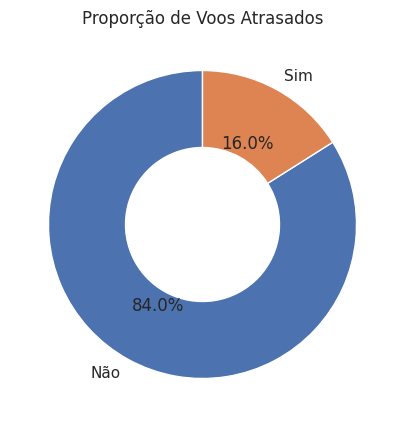

In [ ]:
# Criando gráfico de rosca para melhor visualização da proporção de voos com atraso
sns.set_style("whitegrid")

plt.figure(figsize=(5,5))
delay_counts = vra_nacional['voo_com_atraso'].value_counts()
plt.pie(delay_counts, labels=['Não', 'Sim'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.title("Proporção de Voos Atrasados")
plt.show()

* A variável alvo apresenta **desbalanceamento** moderado, com aproximadamente 84% dos voos classificados como pontuais e 16% como atrasados. Esse cenário é comum em problemas reais de classificação operacional e exige cuidados na avaliação do modelo, uma vez que métricas como acurácia podem ser enganosas.

* Métricas como recall, precision, F1-score e ROC-AUC serão priorizadas, com foco especial na identificação correta de voos com atraso.

* Na etapa de modelagem, serão avaliadas estratégias como ajuste de pesos de classe e técnicas de balanceamento (ex.: SMOTE), sempre aplicadas apenas no conjunto de treino e comparadas com modelos sem balanceamento, a fim de evitar overfitting e vazamento de informação.

#### **Estatísticas descritivas do atraso**

In [ ]:
# Estatísticas para entender o comportamento do atraso

vra_nacional["atraso_partida_min"].describe()

,atraso_partida_min
count,1.499275e+06
mean,4.882068e+00
std,4.303890e+02
min,-5.249060e+05
25%,-6.000000e+00
50%,-1.000000e+00
75%,8.000000e+00
max,1.558000e+03


Em resumo temos:

* min = -524.906 minutos → ~ -364 dias (voo com 1 anos de adiantamento)

* max = 1.558 minutos → ~ 26 horas

* std = 430 minutos → desvio enorme para uma média de ~5 minutos

**Existem valores extremos de atraso o que eleva muito o desvio-padrão e pode provocar ruido na modelagem visto que modelos de ML não lidam bem com outliers sem um tratamento específico. Antes de pensar em excluir estes dados apenas tratando-os como inconsistentes, é preciso tentar entendê-los.**

In [ ]:
# Investigando atrasos maiores que 4 horas
limite_max = 360  # 6 horas
limite_min = 240

#  Partidas atrasadas a mais de 4 horas seguindo a RESOLUÇÃO 400 da ANAC
outlier_sup = vra_nacional.loc[
    vra_nacional["atraso_partida_min"] >= limite_min,
    ["atraso_partida_min"]
].copy()


In [ ]:
outlier_sup['atraso_partida_min']

,atraso_partida_min
782,249.0
1919,264.0
1933,280.0
1946,244.0
1960,264.0
...,...
1951718,248.0
1952263,276.0
1962149,249.0
1964257,255.0


 * Há 3021 voos com atrasos maiores que 4 horas isso é aproximadamente ≈1,25% do total de atrasos que de 240.420.

 * **Insight**: Mais de 98% dos atrasos são menores que 4 horas.  

Isso reforça que:

* O fenômeno dominante é atraso operacional comum

* Os atrasos extremos são eventos raros

* Misturar esses dois eventos pode não representar a realidade do que estamos buscando para o negócio e criação do MVP.


In [ ]:
# Verificando valores nulos antes de prosseguir
vra_nacional.isnull().sum()

,0
icao_empresa_aerea,0
numero_voo,0
codigo_autorizacao_di,0
codigo_tipo_linha,0
icao_aerodromo_origem,0
icao_aerodromo_destino,0
partida_prevista,159
partida_real,0
chegada_prevista,159
chegada_real,0


In [ ]:
# remover todas as linhas com qualquer nulo

vra_nacional = vra_nacional.dropna()

In [ ]:
# verificando novamente os nulos após exclusão
vra_nacional.isnull().sum()

,0
icao_empresa_aerea,0
numero_voo,0
codigo_autorizacao_di,0
codigo_tipo_linha,0
icao_aerodromo_origem,0
icao_aerodromo_destino,0
partida_prevista,0
partida_real,0
chegada_prevista,0
chegada_real,0


#### **Investigando Adiantamentos Extremos**

In [ ]:
# Investigando ADIANTAMENTOS EXTREMOS (adiantamento > 60 min)

LIMITE_ADIANTAMENTO_EXTREMO = -60

total_voos = len(vra_nacional)

adiantamento_extremo = vra_nacional[
    vra_nacional["atraso_partida_min"] < LIMITE_ADIANTAMENTO_EXTREMO
]

qtd_adiantamento_extremo = len(adiantamento_extremo)
pct_adiantamento_extremo = (qtd_adiantamento_extremo / total_voos) * 100

qtd_adiantamento_extremo, pct_adiantamento_extremo


(704, 0.04695602874722783)

* 704 voos com adiantamento extremo (< -60 min) com relação a coluna `atraso_partida_min`

* Esse número é menos de 0,05% dos registros.

Esse volume não representa comportamento normal da operação aérea.

In [ ]:
# Verificando a distribuição dos adiantamentos extremos
adiantamento_extremo["atraso_partida_min"].describe()


,atraso_partida_min
count,704.000000
mean,-1618.700284
std,19759.051911
min,-524906.000000
25%,-1415.000000
50%,-1335.000000
75%,-201.250000
max,-61.000000


Fazendo um resumo da distribuição dos adiantamentos temos:

* count	704	volume irrelevante (<0,05%)

* mean	-1.618 min	~ -27 horas

* mediana	-1.335 min	~ -22 horas

* Q1	-1.415 min	~ -23,5 horas

* Q3	-201 min	~ -3h20

* mínimo	-524.906 min	~ -364 dias (!)

* máximo	-61 min	limiar definido

In [ ]:
# Removendo adiantamentos extremos (inferiores a -60 minutos),
# considerados inconsistências de registro temporal

limite_adiantamento = -60

vra_nacional = vra_nacional[
    vra_nacional["atraso_partida_min"] > limite_adiantamento
].copy()

* **Adiantamentos superiores a 60 minutos não representam antecipação real da operação aérea, mas aparentemente são inconsistências de registro temporal, frequentemente associadas a troca de data (D-1), reprogramação de malha ou erro de preenchimento. Esses casos distorcem significativamente a distribuição do atraso e foram removidos da base de modelagem.**

In [ ]:
# Verificando distribuição novamente após exclusão dos adiantados extremos

vra_nacional["atraso_partida_min"].describe()


,atraso_partida_min
count,1.498559e+06
mean,5.645322e+00
std,3.051587e+01
min,-5.900000e+01
25%,-6.000000e+00
50%,-1.000000e+00
75%,8.000000e+00
max,1.558000e+03


* Agora a leitura estatística dos dados é:

| Métrica                   | Interpretação                                     |
| ------------------------- | ------------------------------------------------- |
| **Mediana = -1 min**      | Operação levemente adiantada na maioria dos casos |
| **Q3 = 8 min**            | 75% dos voos saem até 8 min após o previsto       |
| **Média = 5,6 min**       | Pequeno atraso médio sistêmico                    |
| **Máx = 1558 min (~26h)** | Casos extremos reais (reprogramação, pernoite)    |


#### **E quanto ao tratamento dos atrasos > 240 minutos?**

Como dito anteriormente, temos cerca de  3020 voos com atrasos maiores que 4 horas alguns chegando a mais de 24 horas(possivelmente voos reprogramados). A fim de seguir o modelo da ANAC que indica que a classificação operacional dos atrasos é realizada por faixas de tempo, será recriada uma variável categórica de severidade do atraso, alinhada às faixas oficiais, permitindo tratar atrasos extremos como eventos válidos sem distorcer a distribuição da variável contínua.

In [ ]:
# Visualizando os voos com os maiores atrasos em minutos
vra_nacional.sort_values("atraso_partida_min", ascending=False).head(10)


,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,tempo_voo_estimado,tempo_voo_real,diferenca_previsao_real,atraso_partida_min,voo_com_atraso
403496,AZU,4275,0,N,SBCY,SBCG,2023-02-03 00:55:00,2023-02-04 02:53:00,2023-02-03 02:05:00,2023-02-04 04:00:00,REALIZADO,1.166667,1.116667,-0.050000,1558.0,1
115746,AZU,2654,0,N,SBPV,SBEG,2023-10-27 00:10:00,2023-10-28 01:35:00,2023-10-27 01:35:00,2023-10-28 02:57:00,REALIZADO,1.416667,1.366667,-0.050000,1525.0,1
1825104,AZU,4053,0,N,SBSO,SBCY,2024-08-23 00:15:00,2024-08-24 01:09:00,2024-08-23 01:05:00,2024-08-24 01:56:00,REALIZADO,0.833333,0.783333,-0.050000,1494.0,1
460723,GLO,1591,0,N,SBSG,SBGR,2023-03-26 12:40:00,2023-03-27 13:16:00,2023-03-26 16:10:00,2023-03-27 16:45:00,REALIZADO,3.500000,3.483333,-0.016667,1476.0,1
913872,AZU,4544,0,N,SBEG,SBBE,2023-09-26 00:55:00,2023-09-27 01:24:00,2023-09-26 03:00:00,2023-09-27 03:32:00,REALIZADO,2.083333,2.133333,0.050000,1469.0,1
460724,GLO,1591,0,N,SBSG,SBGR,2023-03-27 12:40:00,2023-03-28 13:06:00,2023-03-27 16:10:00,2023-03-28 16:54:00,REALIZADO,3.500000,3.800000,0.300000,1466.0,1
913869,AZU,4544,0,N,SBEG,SBBE,2023-09-19 00:55:00,2023-09-20 01:18:00,2023-09-19 03:00:00,2023-09-20 03:22:00,REALIZADO,2.083333,2.066667,-0.016667,1463.0,1
1233009,AZU,4053,0,N,SBSO,SBCY,2024-12-13 00:55:00,2024-12-14 01:13:00,2024-12-13 01:45:00,2024-12-14 02:02:00,REALIZADO,0.833333,0.816667,-0.016667,1458.0,1
115742,AZU,2654,0,N,SBPV,SBEG,2023-10-23 00:10:00,2023-10-24 00:28:00,2023-10-23 01:35:00,2023-10-24 01:48:00,REALIZADO,1.416667,1.333333,-0.083333,1458.0,1
858131,GLO,2144,0,N,SBEG,SBSN,2023-08-04 00:45:00,2023-08-05 01:00:00,2023-08-04 02:05:00,2023-08-05 02:09:00,REALIZADO,1.333333,1.150000,-0.183333,1455.0,1


#### **Criar uma feature categórica de severidade**

In [ ]:
def classificar_atraso(minutos):
    if minutos < 0:
        return "Antecipado"
    elif minutos <= 15:
        return "Pontual"
    elif minutos <= 60:
        return "Atraso 15-60"
    elif minutos <= 120:
        return "Atraso 60-120"
    elif minutos <= 240:
        return "Atraso 120-240"
    else:
        return "Atraso > 240"

vra_nacional["faixa_atraso_partida"] = (
    vra_nacional["atraso_partida_min"]
    .apply(classificar_atraso)
)


In [ ]:
# Verificando nova atraves dos atrasos extremos

vra_nacional.sort_values("atraso_partida_min", ascending=False).head(10)

,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,tempo_voo_estimado,tempo_voo_real,diferenca_previsao_real,atraso_partida_min,voo_com_atraso,faixa_atraso_partida
403496,AZU,4275,0,N,SBCY,SBCG,2023-02-03 00:55:00,2023-02-04 02:53:00,2023-02-03 02:05:00,2023-02-04 04:00:00,REALIZADO,1.166667,1.116667,-0.050000,1558.0,1,Atraso > 240
115746,AZU,2654,0,N,SBPV,SBEG,2023-10-27 00:10:00,2023-10-28 01:35:00,2023-10-27 01:35:00,2023-10-28 02:57:00,REALIZADO,1.416667,1.366667,-0.050000,1525.0,1,Atraso > 240
1825104,AZU,4053,0,N,SBSO,SBCY,2024-08-23 00:15:00,2024-08-24 01:09:00,2024-08-23 01:05:00,2024-08-24 01:56:00,REALIZADO,0.833333,0.783333,-0.050000,1494.0,1,Atraso > 240
460723,GLO,1591,0,N,SBSG,SBGR,2023-03-26 12:40:00,2023-03-27 13:16:00,2023-03-26 16:10:00,2023-03-27 16:45:00,REALIZADO,3.500000,3.483333,-0.016667,1476.0,1,Atraso > 240
913872,AZU,4544,0,N,SBEG,SBBE,2023-09-26 00:55:00,2023-09-27 01:24:00,2023-09-26 03:00:00,2023-09-27 03:32:00,REALIZADO,2.083333,2.133333,0.050000,1469.0,1,Atraso > 240
460724,GLO,1591,0,N,SBSG,SBGR,2023-03-27 12:40:00,2023-03-28 13:06:00,2023-03-27 16:10:00,2023-03-28 16:54:00,REALIZADO,3.500000,3.800000,0.300000,1466.0,1,Atraso > 240
913869,AZU,4544,0,N,SBEG,SBBE,2023-09-19 00:55:00,2023-09-20 01:18:00,2023-09-19 03:00:00,2023-09-20 03:22:00,REALIZADO,2.083333,2.066667,-0.016667,1463.0,1,Atraso > 240
1233009,AZU,4053,0,N,SBSO,SBCY,2024-12-13 00:55:00,2024-12-14 01:13:00,2024-12-13 01:45:00,2024-12-14 02:02:00,REALIZADO,0.833333,0.816667,-0.016667,1458.0,1,Atraso > 240
115742,AZU,2654,0,N,SBPV,SBEG,2023-10-23 00:10:00,2023-10-24 00:28:00,2023-10-23 01:35:00,2023-10-24 01:48:00,REALIZADO,1.416667,1.333333,-0.083333,1458.0,1,Atraso > 240
858131,GLO,2144,0,N,SBEG,SBSN,2023-08-04 00:45:00,2023-08-05 01:00:00,2023-08-04 02:05:00,2023-08-05 02:09:00,REALIZADO,1.333333,1.150000,-0.183333,1455.0,1,Atraso > 240


* Agrupando os atrasos na coluna `faixa_atraso_partida` pode ajudar o modelo a entender os padrões necessários principalmente quando falamos dos atrasos/realocação de voos( atrasos de  > 240)

#### **Analisar o perfil das faixas de atraso**

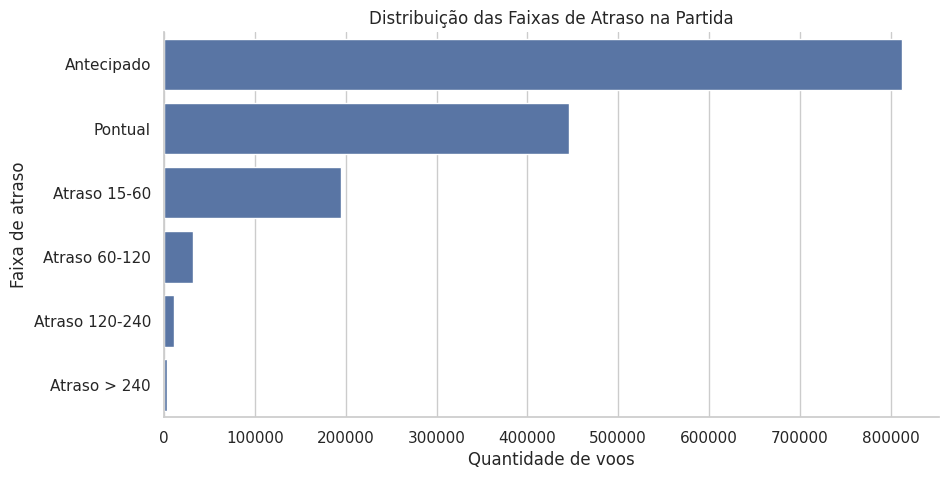

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data=vra_nacional,
    y="faixa_atraso_partida",
    order=vra_nacional["faixa_atraso_partida"].value_counts().index
)

plt.title("Distribuição das Faixas de Atraso na Partida")
plt.xlabel("Quantidade de voos")
plt.ylabel("Faixa de atraso")

sns.despine()
plt.show()

* A maior parte da operação ocorre dentro de atrasos moderados, enquanto atrasos extremos representam eventos raros, porém relevantes.

#### **Análise da distribuição do atraso em minutos**

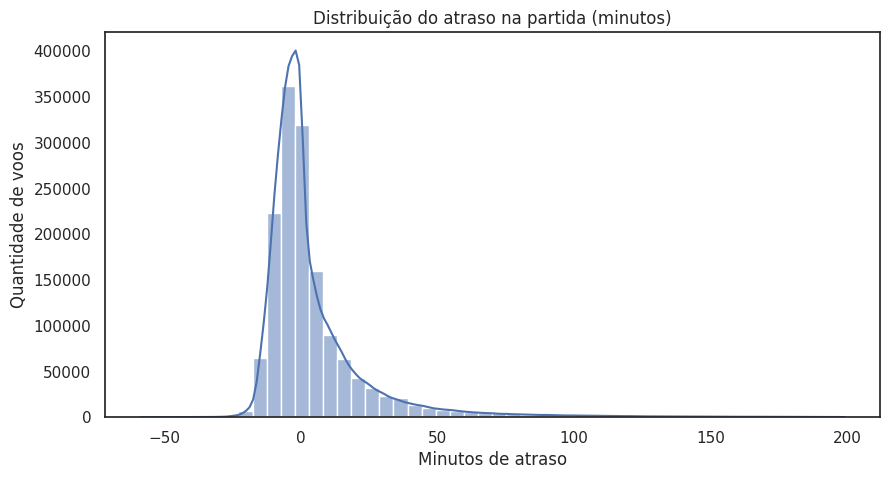

In [ ]:
vra_modelo = vra_nacional[
    vra_nacional["atraso_partida_min"].between(-60, 300)
]

sns.set_style("white")

plt.figure(figsize=(10,5))
sns.histplot(vra_nacional[vra_nacional['atraso_partida_min'] < 200]['atraso_partida_min'], bins=50, kde=True)
plt.title("Distribuição do atraso na partida (minutos)")
plt.xlabel("Minutos de atraso")
plt.ylabel("Quantidade de voos")
plt.show()

* A maior parte dos voos opera próxima do horário previsto, com antecipações leves e poucos atrasos extremos conforme evidencia a assimetria da calda a direita.

#### **Percentual por faixa**


In [ ]:
faixa_pct = (
    vra_nacional["faixa_atraso_partida"]
    .value_counts(normalize=True)
    .mul(100)
    .round(3)
)

faixa_pct


,proportion
faixa_atraso_partida,
Antecipado,54.231
Pontual,29.726
Atraso 15-60,12.970
Atraso 60-120,2.121
Atraso 120-240,0.755
Atraso > 240,0.198


Apenas 1,9% dos voos apresentam atraso superior a 240 minutos, caracterizando eventos excepcionais da operação.

#### **Distribuição das faixas por companhia (Top 3)**

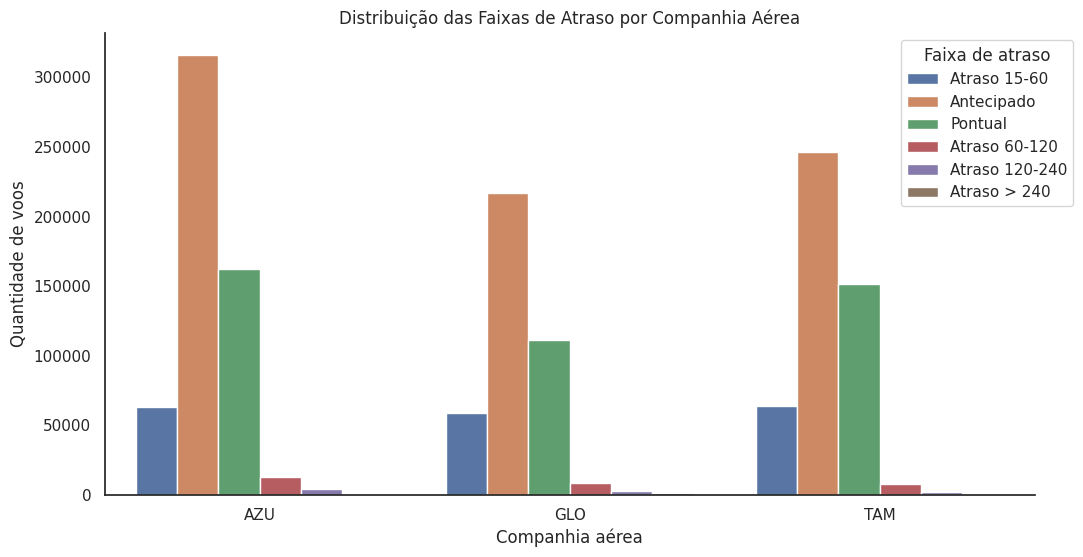

In [ ]:
top_cias = ["AZU", "GLO", "TAM"]

df_cia = vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top_cias)]

plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_cia,
    x="icao_empresa_aerea",
    hue="faixa_atraso_partida",
    order=top_cias
)

plt.title("Distribuição das Faixas de Atraso por Companhia Aérea")
plt.xlabel("Companhia aérea")
plt.ylabel("Quantidade de voos")

plt.legend(title="Faixa de atraso", bbox_to_anchor=(1.05, 1))
sns.despine()
plt.show()


In [ ]:
# Filtrar empresas com base mínima de voos
total_voos_cia = vra_nacional.groupby("icao_empresa_aerea").size()

cia_com_base = total_voos_cia[total_voos_cia >= 1000].index


#### **Quantidade de Atrasos Graves Por Cia( > 240 min)**

In [ ]:
# Mostrar percentual + volume absoluto de voos com atrasos graves

resumo_atraso_grave = pd.DataFrame({
    "total_voos": total_voos_cia,
    "voos_atraso_grave": vra_nacional[vra_nacional["faixa_atraso_partida"] == "Atraso > 240"]
        .groupby("icao_empresa_aerea").size()
})

resumo_atraso_grave["pct_atraso_grave"] = (
    resumo_atraso_grave["voos_atraso_grave"]
    / resumo_atraso_grave["total_voos"] * 100
)

resumo_atraso_grave.sort_values("pct_atraso_grave", ascending=False).round(2)


,total_voos,voos_atraso_grave,pct_atraso_grave
icao_empresa_aerea,,,
ABJ,1545,160.0,10.36
PTB,30034,481.0,1.60
CQB,191,3.0,1.57
PAM,3193,43.0,1.35
ACN,34018,221.0,0.65
GLO,398243,970.0,0.24
AZU,559356,772.0,0.14
TAM,471976,316.0,0.07
SID,3,NaN,NaN


* Apesar do percentual baixo, a GLO concentra um volume absoluto relevante de atrasos graves.

#### **Atraso por empresa aérea(mediana**

In [ ]:
# Filtrando voos com atraso
vra_atrasos = vra_modelo[
    vra_modelo["atraso_partida_min"] > 0
]

In [ ]:
# Mediana de atraso em minutos por Cia
vra_atrasos.groupby("icao_empresa_aerea")["atraso_partida_min"].median().sort_values()

,atraso_partida_min
icao_empresa_aerea,
AZU,10.0
TAM,11.0
GLO,13.0
PAM,19.0
CQB,19.5
PTB,25.0
ACN,25.0
SID,65.0
ABJ,165.0


* A mediana do atraso entre voos atrasados revela diferenças relevantes entre as companhias aéreas. **Grandes operadoras apresentam atrasos típicos inferiores a 15 minutos**, indicando maior previsibilidade operacional.

* Em contraste, **companhias com menor volume de operações exibem medianas significativamente mais altas, sugerindo que, quando ocorrem atrasos, estes tendem a ser mais severos**. Esse comportamento reforça a necessidade de tratar a variável empresa aérea de forma cuidadosa na modelagem.

### **Atraso médio das empresas com mais voos**

In [ ]:
# Identificar as TOP 5 companhias com mais voos

top5_cias = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .head(5)
    .index
)

# Calcular o atraso médio de partida apenas dessas companhias

atraso_medio_cia = (
    vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top5_cias)]
    .groupby("icao_empresa_aerea")["atraso_partida_min"]
    .mean()
    .sort_values()
)

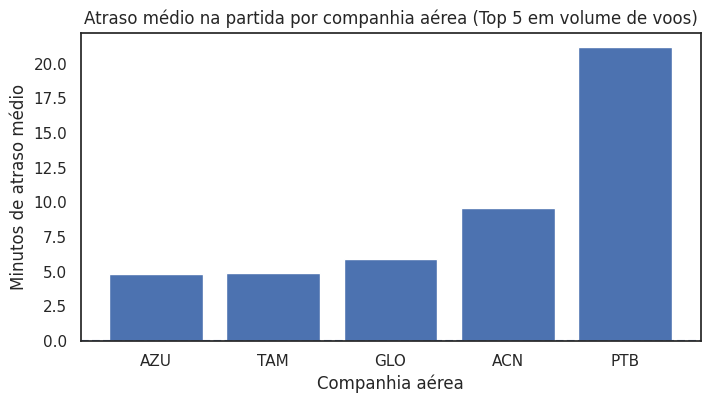

In [ ]:
# Gráfico de barras (atraso médio por companhia)

sns.set_style("white")

plt.figure(figsize=(8,4))
plt.bar(
    atraso_medio_cia.index,
    atraso_medio_cia.values
)
plt.axhline(0, linestyle="--")  # linha de referência (pontualidade)
plt.title("Atraso médio na partida por companhia aérea (Top 5 em volume de voos)")
plt.ylabel("Minutos de atraso médio")
plt.xlabel("Companhia aérea")
plt.show()

### Decomposição das colunas de data(a partir de partida_prevista)

In [ ]:
# =========================
# Features temporais (EDA)
# =========================
vra_nacional["hora_prevista"] = vra_nacional["partida_prevista"].dt.hour

# Hora formatada (apenas para visualização)
vra_nacional["hora_prevista_str"] = (
    vra_nacional["partida_prevista"].dt.strftime("%H:%M:%S")
)

# Ano apenas usar na análise
vra_nacional["ano"] = vra_nacional["partida_prevista"].dt.year



In [ ]:
# =========================
# Features temporais (ML)
# =========================

# Hora contínua (melhor representação para modelos)
vra_nacional["hora_prevista_frac"] = (
    vra_nacional["partida_prevista"].dt.hour +
    vra_nacional["partida_prevista"].dt.minute / 60
)

vra_nacional["dia_semana"] = vra_nacional["partida_prevista"].dt.dayofweek
vra_nacional["mes"] = vra_nacional["partida_prevista"].dt.month

vra_nacional["eh_fim_de_semana"] = (
    vra_nacional["dia_semana"].isin([5, 6]).astype(int)
)


In [ ]:
# Visualizando dataset apos criação de novas colunas
vra_nacional.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498559 entries, 104 to 1969126
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   icao_empresa_aerea       1498559 non-null  object        
 1   numero_voo               1498559 non-null  object        
 2   codigo_autorizacao_di    1498559 non-null  object        
 3   codigo_tipo_linha        1498559 non-null  object        
 4   icao_aerodromo_origem    1498559 non-null  object        
 5   icao_aerodromo_destino   1498559 non-null  object        
 6   partida_prevista         1498559 non-null  datetime64[ns]
 7   partida_real             1498559 non-null  datetime64[ns]
 8   chegada_prevista         1498559 non-null  datetime64[ns]
 9   chegada_real             1498559 non-null  datetime64[ns]
 10  situacao_voo             1498559 non-null  object        
 11  tempo_voo_estimado       1498559 non-null  float64       
 12  tem

In [ ]:
# Resetando o index
vra_nacional.reset_index(drop=True, inplace=True)


#### Criação da coluna **faixa_horaria**

**Justificativa:** Pode ser uma feature boa para o modelo pois traduz comportamento operacional, não só tempo. Por exemplo:

* Voos da manhã tendem a ser mais pontuais

* Noite/madrugada podem sofrer com:

* malha já “contaminada” por atrasos anteriores

* restrições operacionais

* menor capacidade de recuperação

In [ ]:
# Criação da coluna faixa_horaria
vra_nacional["faixa_horaria"] = pd.cut(
    vra_nacional["hora_prevista"],
    bins=[-1, 5, 11, 17, 23],
    labels=["madrugada", "manha", "tarde", "noite"]
)

#### **Criação das colunas `eh_feriado` e `eh_vespera_feriado`**

In [ ]:
# Importando biblioteca holidays
import holidays

# Feriados nacionais do Brasil
br_holidays = holidays.Brazil(years=vra_nacional["ano"].unique())

# Criando a feature
vra_nacional["eh_feriado"] = (
    vra_nacional["partida_prevista"].dt.normalize().isin(br_holidays)
).astype(int)


/tmp/ipython-input-4112182147.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  vra_nacional["partida_prevista"].dt.normalize().isin(br_holidays)


In [ ]:
# Indicador de véspera de feriado nacional
# Usado como proxy de aumento potencial de demanda
vra_nacional["eh_vespera_feriado"] = (
    vra_nacional["partida_prevista"].dt.normalize() + pd.Timedelta(days=1)
).isin(br_holidays).astype(int)


/tmp/ipython-input-1548632891.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ).isin(br_holidays).astype(int)


**Justificativa:** A variável **eh_feriado** e **eh_vespera_feriado** foram criadas para capturar impactos operacionais associados a datas de maior demanda no transporte aéreo, como aumento de fluxo de passageiros e maior complexidade logística, fatores que historicamente influenciam o comportamento dos atrasos.

**Observação:** A variável **eh_vespera_feriado** não assume que toda véspera gera atraso, mas permite que o modelo aprenda se há impacto médio relevante.”

In [ ]:
vra_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498559 entries, 0 to 1498558
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   icao_empresa_aerea       1498559 non-null  object        
 1   numero_voo               1498559 non-null  object        
 2   codigo_autorizacao_di    1498559 non-null  object        
 3   codigo_tipo_linha        1498559 non-null  object        
 4   icao_aerodromo_origem    1498559 non-null  object        
 5   icao_aerodromo_destino   1498559 non-null  object        
 6   partida_prevista         1498559 non-null  datetime64[ns]
 7   partida_real             1498559 non-null  datetime64[ns]
 8   chegada_prevista         1498559 non-null  datetime64[ns]
 9   chegada_real             1498559 non-null  datetime64[ns]
 10  situacao_voo             1498559 non-null  object        
 11  tempo_voo_estimado       1498559 non-null  float64       
 12  

### Análise Bivariada da Varável Target

#### **O horário do voo influencia o atraso? (Atraso médio por faixa horária)**

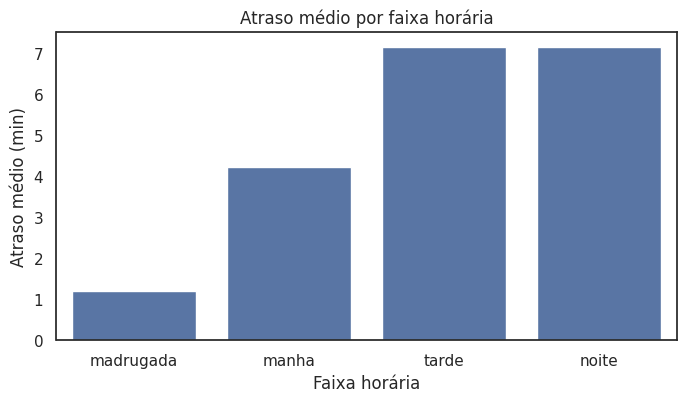

In [ ]:
ordem = ["madrugada", "manha", "tarde", "noite"]

plt.figure(figsize=(8,4))
sns.barplot(
    data=vra_nacional,
    x="faixa_horaria",
    y="atraso_partida_min",
    order=ordem,
    estimator="mean",
    errorbar=None
)
plt.title("Atraso médio por faixa horária")
plt.xlabel("Faixa horária")
plt.ylabel("Atraso médio (min)")
plt.show()


* Voos operados no fim do dia apresentam maior risco de atraso devido ao acúmulo de impactos operacionais ao longo da jornada.”

#### **Em quais dias os voos mais atrasam? (Probabilidade de atraso por dia da semana)**

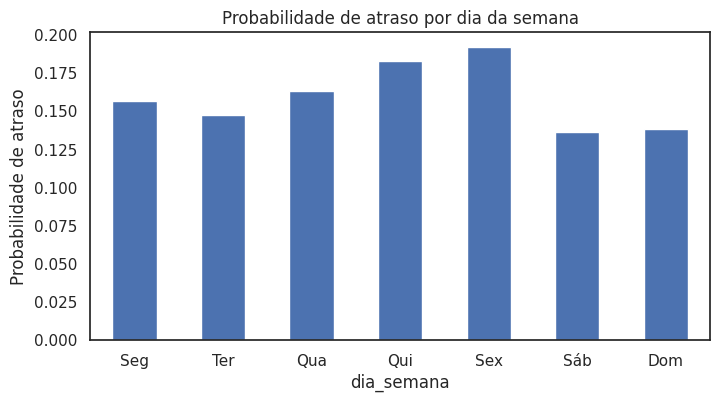

In [ ]:
dias = ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"]

taxa_atraso = (
    vra_nacional
    .groupby("dia_semana")["voo_com_atraso"]
    .mean()
)

plt.figure(figsize=(8,4))
taxa_atraso.plot(kind="bar")
plt.xticks(range(7), dias, rotation=0)
plt.title("Probabilidade de atraso por dia da semana")
plt.ylabel("Probabilidade de atraso")
plt.show()


#### **O atraso varia entre companhias? (Empresa aérea × atraso)**

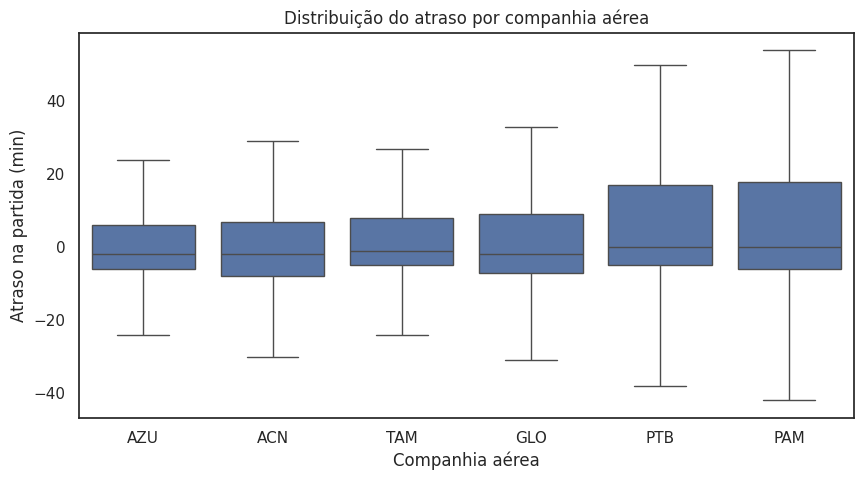

In [ ]:
top_cias = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .head(6)
    .index
)

plt.figure(figsize=(10,5))
sns.boxplot(
    data=vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top_cias)],
    x="icao_empresa_aerea",
    y="atraso_partida_min",
    showfliers=False
)
plt.title("Distribuição do atraso por companhia aérea")
plt.xlabel("Companhia aérea")
plt.ylabel("Atraso na partida (min)")
plt.show()


#### **Feriados realmente impactam atraso? (Feriado × atraso)**

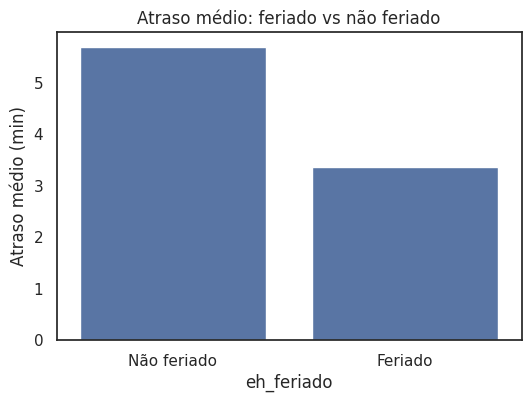

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=vra_nacional,
    x="eh_feriado",
    y="atraso_partida_min",
    estimator="mean",
    errorbar=None
)
plt.xticks([0,1], ["Não feriado", "Feriado"])
plt.title("Atraso médio: feriado vs não feriado")
plt.ylabel("Atraso médio (min)")
plt.show()


In [ ]:
vra_nacional.groupby("eh_feriado")["atraso_partida_min"].describe()

,count,mean,std,min,25%,50%,75%,max
eh_feriado,,,,,,,,
0,1464361.0,5.698882,30.559660,-59.0,-6.0,-1.0,8.0,1558.0
1,34198.0,3.351892,28.484139,-54.0,-7.0,-2.0,4.0,1110.0


| Métrica       | Não feriado | Feriado    |
| ------------- | ----------- | ---------- |
| Mediana (P50) | **-1 min**  | **-2 min** |
| P75           | **8 min**   | **4 min**  |
| P25           | -6 min      | -7 min     |
| Máx           | 1558        | 1110       |


**Explicação:** A análise por quantis indica que feriados não estão associados a maior atraso na partida. Pelo contrário, tanto a mediana quanto o percentil 75 do atraso são menores em feriados, sugerindo operação mais previsível nesses dias. Assim, a variável `eh_feriado` apresenta baixo poder explicativo isolado para atraso.

#### **Vésperas de feriado impactam atraso?**

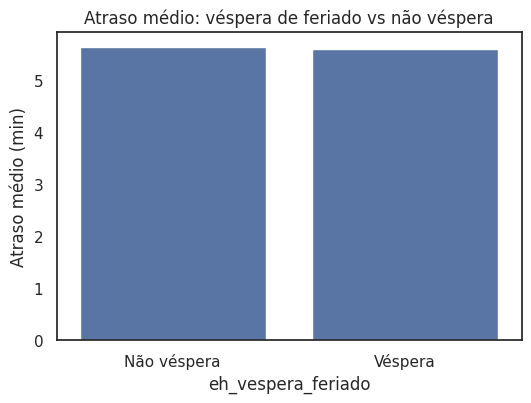

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=vra_nacional,
    x="eh_vespera_feriado",
    y="atraso_partida_min",
    estimator="mean",
    errorbar=None
)
plt.xticks([0,1], ["Não véspera", "Véspera"])
plt.title("Atraso médio: véspera de feriado vs não véspera")
plt.ylabel("Atraso médio (min)")
plt.show()

In [ ]:
vra_nacional.groupby("eh_vespera_feriado")["atraso_partida_min"].describe()


,count,mean,std,min,25%,50%,75%,max
eh_vespera_feriado,,,,,,,,
0,1463029.0,5.646283,30.438441,-59.0,-6.0,-1.0,8.0,1558.0
1,35530.0,5.605742,33.549930,-52.0,-6.0,-1.0,8.0,1453.0


**Explicação:** Apesar da idéia inicial de que feriados e suas vésperas poderiam aumentar o atraso dos voos, a análise estatística mostrou distribuições praticamente idênticas em relação aos dias comuns(poderia testar a significancia estatística posteriormente). Isso sugere que o planejamento operacional das companhias aéreas absorve bem os efeitos de calendário, tornando essas variáveis pouco informativas para previsão de atraso

#### **Probabilidade de Atraso por compahia aérea**

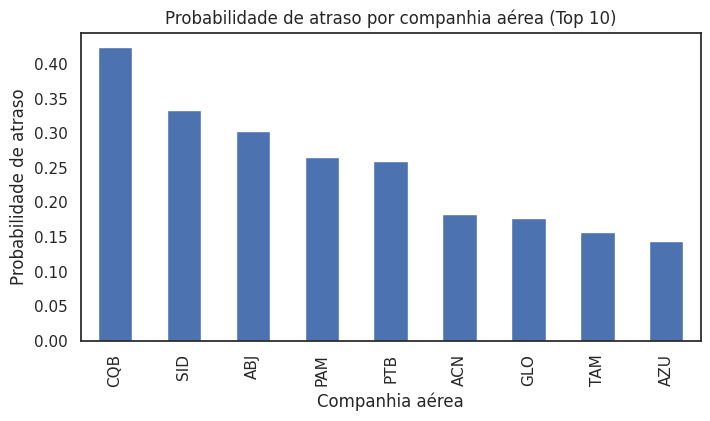

In [ ]:
top_cias = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .head(10)
    .index
)

prob_atraso_cia = (
    vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top_cias)]
    .groupby("icao_empresa_aerea")["voo_com_atraso"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
prob_atraso_cia.plot(kind="bar")
plt.title("Probabilidade de atraso por companhia aérea (Top 10)")
plt.ylabel("Probabilidade de atraso")
plt.xlabel("Companhia aérea")
plt.show()


#### **Atrasos por mês e ano**

In [ ]:
mensal_ano = (
    vra_nacional
    .groupby(["ano", "mes"])
    .agg(
        taxa_atraso=("voo_com_atraso", "mean"),
        atraso_mediano=("atraso_partida_min", "median"),
        qtd_voos=("voo_com_atraso", "size")
    )
    .reset_index()
)

mensal_ano["taxa_atraso"] *= 100
mensal_ano


,ano,mes,taxa_atraso,atraso_mediano,qtd_voos
0,2023,1,17.397293,-1.0,66792
1,2023,2,17.306869,-1.0,56076
2,2023,3,13.706382,-2.0,63620
3,2023,4,14.002201,-2.0,59962
4,2023,5,10.309407,-2.0,64252
5,2023,6,14.491426,-1.0,61112
6,2023,7,13.921166,-1.0,67128
7,2023,8,17.244000,-1.0,65791
8,2023,9,15.974580,-1.0,61842
9,2023,10,22.506091,0.0,61570


#### **Taxa de atraso por mês (linhas por ano)**

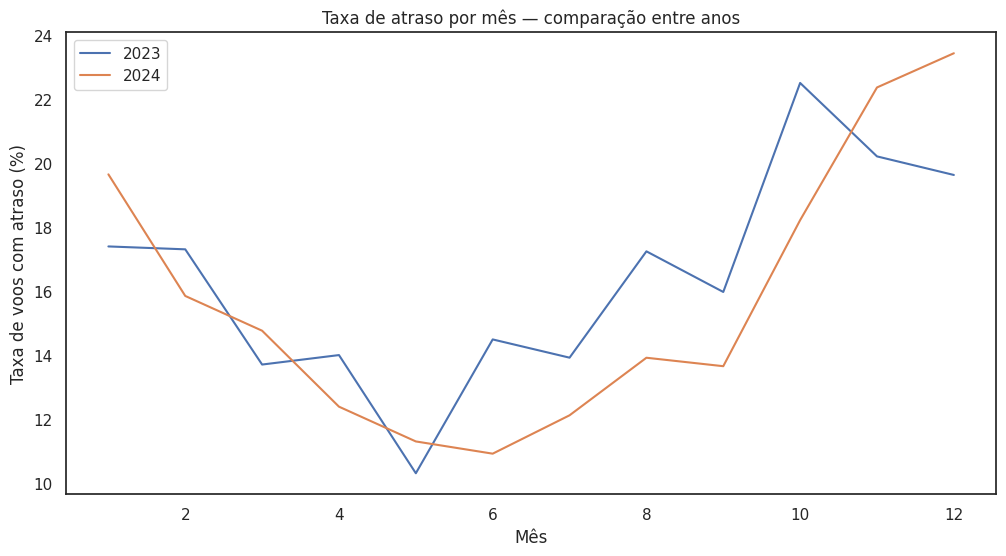

In [ ]:
plt.figure()

for ano in sorted(mensal_ano["ano"].unique()):
    df_plot = mensal_ano[mensal_ano["ano"] == ano]
    plt.plot(df_plot["mes"], df_plot["taxa_atraso"], label=str(ano))

plt.xlabel("Mês")
plt.ylabel("Taxa de voos com atraso (%)")
plt.title("Taxa de atraso por mês — comparação entre anos")
plt.legend()
plt.show()


**Explicação:** Observa-se com base nesses dados redução gradual dos atrasos no primeiro semestre, com mínimo entre maio e junho, seguida de aumento progressivo a partir do terceiro trimestre, culminando em picos nos meses de outubro a dezembro(**indicando que o final de ano é a época onde ocorre o maior pico de demanda**). A repetição desse comportamento em ambos os anos indica que o atraso está fortemente associado à sazonalidade operacional, e não a eventos pontuais como feriados ou vésperas.

#### **Volume de voos**

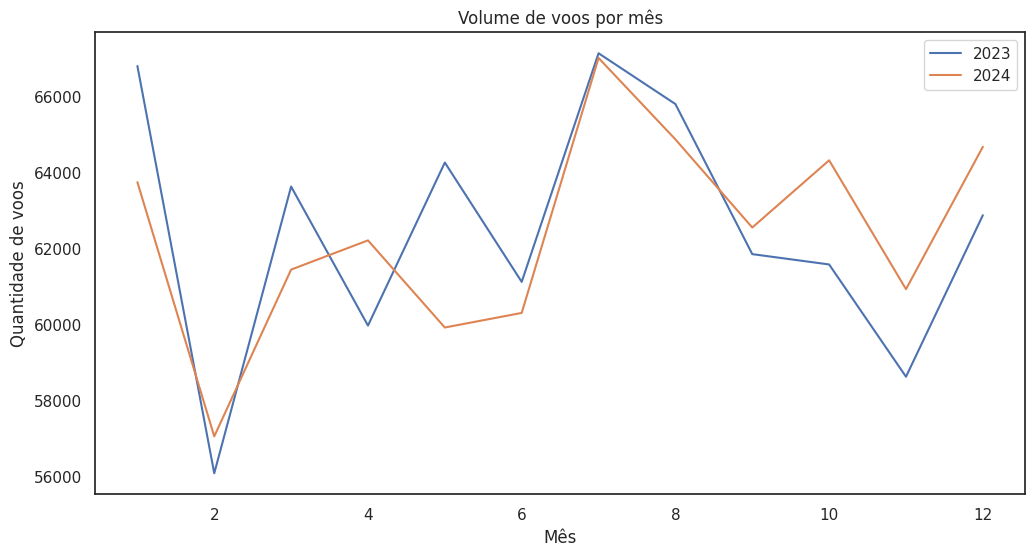

In [ ]:
plt.figure()

for ano in sorted(mensal_ano["ano"].unique()):
    df_plot = mensal_ano[mensal_ano["ano"] == ano]
    plt.plot(df_plot["mes"], df_plot["qtd_voos"], label=str(ano))

plt.xlabel("Mês")
plt.ylabel("Quantidade de voos")
plt.title("Volume de voos por mês")
plt.legend()
plt.show()



**Explicação:** A análise conjunta do volume mensal de voos e da taxa de atraso indica que o aumento da demanda, por si só, não explica os atrasos. Embora meses como julho apresentem elevado volume de operações, os maiores níveis de atraso concentram-se no último trimestre do ano.

* Esse comportamento sugere a existência de um efeito de saturação operacional, no qual a combinação entre alta demanda, menor folga operacional e outros fatores que não estão mapeados aqui resultam em maior probabilidade de atrasos.

#### **Criação de feature de congestionamento operacional**

**Slot de aeroporto** é a autorização concedida para uma aeronave pousar ou decolar em um aeroporto movimentado (coordenado) em um horário específico, funcionando como uma "vaga" para organizar o fluxo e evitar congestionamentos, garantindo segurança e pontualidade, e é regulado por órgãos como a ANAC no Brasil, seguindo padrões internacionais da IATA.  

**Fonte:** https://pt.wikipedia.org/wiki/Slot_(avia%C3%A7%C3%A3o)

**Quantos voos estavam programados para o mesmo aeroporto de origem no mesmo horário (slot de 1 hora)?**

In [ ]:
# Criar slot horário diretamente no dataframe principal
vra_nacional["slot_hora"] = vra_nacional["partida_prevista"].dt.floor("h")

In [ ]:
# =====================================================
# Feature: volume de voos por aeroporto e slot horário
# =====================================================

vra_aux = vra_nacional[
    ["icao_aerodromo_origem", "slot_hora"]
].copy()



# Agrupar para obter volume de voos por aeroporto + slot

volume_slot = (
    vra_aux
    .groupby(["icao_aerodromo_origem", "slot_hora"])
    .size()
    .reset_index(name="voos_no_slot")
)


# Fazer o merge de volta no dataframe principal
vra_nacional = vra_nacional.merge(
    volume_slot,
    on=["icao_aerodromo_origem", "slot_hora"],
    how="left"
)


In [ ]:
vra_nacional[["icao_aerodromo_origem", "slot_hora", "voos_no_slot"]]

,icao_aerodromo_origem,slot_hora,voos_no_slot
0,SBGR,2023-01-17 12:00:00,17
1,SBCT,2023-01-09 07:00:00,5
2,SBCT,2023-01-10 11:00:00,5
3,SBCT,2023-01-11 07:00:00,5
4,SBCT,2023-01-12 07:00:00,4
...,...,...,...
1498554,SBRF,2024-09-29 18:00:00,5
1498555,SBRF,2024-09-30 19:00:00,1
1498556,SBIL,2024-09-01 14:00:00,2
1498557,SBIL,2024-09-02 15:00:00,1


In [ ]:
vra_nacional["voos_no_slot"].describe()

,voos_no_slot
count,1.498559e+06
mean,8.514962e+00
std,7.223454e+00
min,1.000000e+00
25%,2.000000e+00
50%,6.000000e+00
75%,1.400000e+01
max,3.100000e+01


* É possível perceber que:

* Mediana = 6 voos por slot

* 75% dos slots têm até 14 voos

* Máximo = 31 voos no mesmo aeroporto, na mesma hora

* Distribuição assimétrica à direita (cauda longa)

#### **Distribuição de voos por slot (histograma)**

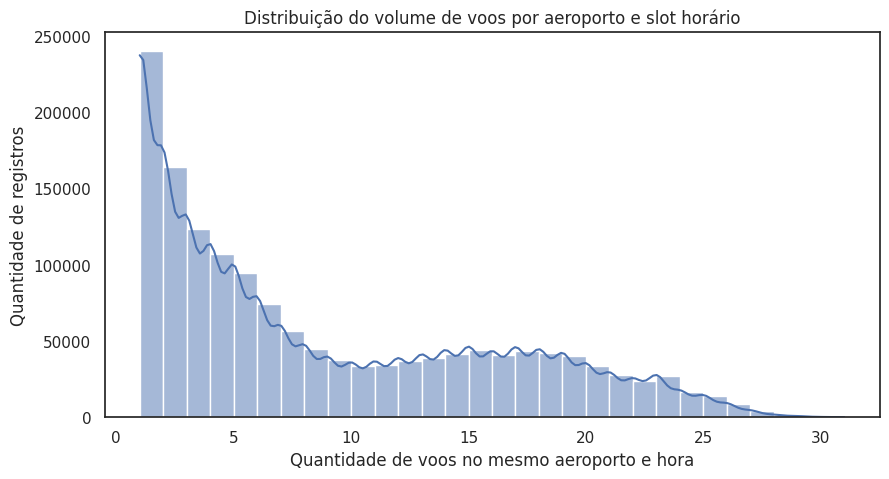

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(
    vra_nacional["voos_no_slot"],
    bins=30,
    kde=True
)
plt.title("Distribuição do volume de voos por aeroporto e slot horário")
plt.xlabel("Quantidade de voos no mesmo aeroporto e hora")
plt.ylabel("Quantidade de registros")
plt.show()


* Essa variável representa pressão operacional no aeroporto naquele horário.

#### Atraso médio vs volume de slot (relação direta)

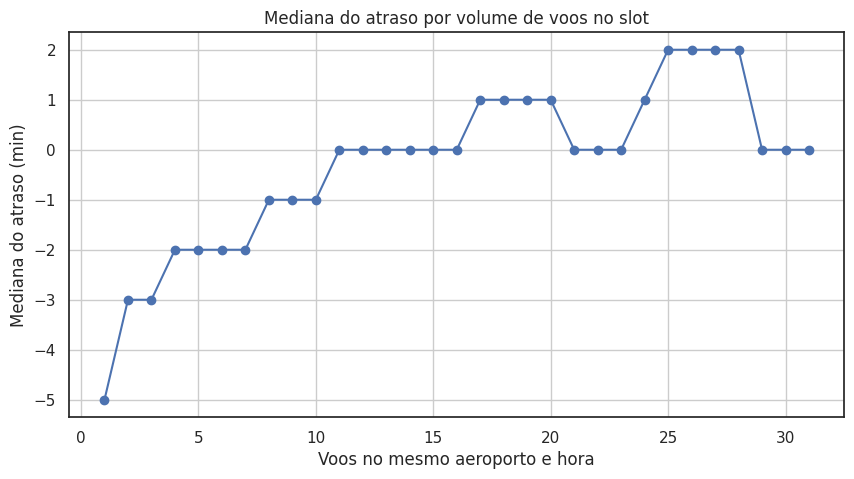

In [ ]:
slot_delay = (
    vra_nacional
    .groupby("voos_no_slot")["atraso_partida_min"]
    .median()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(
    slot_delay["voos_no_slot"],
    slot_delay["atraso_partida_min"],
    marker="o"
)
plt.title("Mediana do atraso por volume de voos no slot")
plt.xlabel("Voos no mesmo aeroporto e hora")
plt.ylabel("Mediana do atraso (min)")
plt.grid(True)
plt.show()


**Justificativa:**   **Volume de voos por aeroporto e slot horário** foi criado para tentarcapturar o nível de congestionamento operacional em cada aeroporto. Horários com maior concentração de voos tendem a apresentar maior competição por recursos críticos (pistas, portões e sequenciamento), o que impacta diretamente a probabilidade de atraso.

### Análise de correlação (Análise do target)

A análise de correlação é importante porque ajuda a
descobrir e quantificar as relações entre variáveis, o que é fundamental para a tomada de decisões, previsões e aprofundamento da pesquisa

#### **Correlação Numéricas × target binário**

In [ ]:
# Usando correlação de Spearman poís:

# Não assume linearidade

# Funciona melhor com distribuições assimétricas

from scipy.stats import spearmanr

vars_numericas = [
    "tempo_voo_estimado",
    "hora_prevista_frac",
    "voos_no_slot",
    "dia_semana",
    "mes"
]

corr_spearman = []

for col in vars_numericas:
    corr, p = spearmanr(vra_nacional[col], vra_nacional["voo_com_atraso"])
    corr_spearman.append((col, corr, p))

corr_df = (
    pd.DataFrame(corr_spearman, columns=["variavel", "spearman_corr", "p_value"])
    .sort_values("spearman_corr", ascending=False)
)

corr_df


,variavel,spearman_corr,p_value
1,hora_prevista_frac,0.117547,0.000000e+00
2,voos_no_slot,0.053568,0.000000e+00
4,mes,0.046754,0.000000e+00
0,tempo_voo_estimado,0.010528,5.269115e-38
3,dia_semana,-0.006279,1.508175e-14


** Observação importante**
**Os p-value pequenos não garante efeito estatístico nesse caso pois estamos lidando com uma amostra MUITO GRANDE. **

* **hora_prevista_frac**

Spearman = 0.118 | p-value ≈ 0

Interpretação técnica:

Existe uma associação monotônica positiva clara entre o horário do voo e a probabilidade de atraso.

À medida que o dia avança, aumenta a chance de atraso.

---
* **voos_no_slot**

Spearman = 0.054 | p-value ≈ 0

Interpretação técnica:

Quanto maior o número de voos no mesmo aeroporto e horário, maior a probabilidade de atraso.

A correlação apesar de baixa, é consistente, como já vimos no EDA visual.

---  
* **mes**

Spearman = 0.047 | p-value ≈ 0



Interpretação técnica:

Existe um padrão sazonal ao longo do ano.

Alguns meses concentram mais atrasos (ex: alta temporada, clima, demanda).

---
* **tempo_voo_estimado**

Spearman = 0.011 | p-value extremamente baixo

Conclusão:

* Isoladamente, é fraca.

* Em interação com outras variáveis (origem, destino, horário), pode ganhar relevância.

---
* **dia_semana**

Spearman = -0.006 | p-value muito baixo

Interpretação técnica:

Não existe relação monotônica relevante entre o dia da semana e atraso.

O p-value é irrelevante aqui (efeito de N grande).

---


#### **Binárias × target binário - Point-Biserial**

In [ ]:
from scipy.stats import pointbiserialr

vars_binarias = [
    "eh_fim_de_semana",
    "eh_feriado",
    "eh_vespera_feriado"
]

resultados_bin = []

for col in vars_binarias:
    corr, p_value = pointbiserialr(
        vra_nacional[col],
        vra_nacional["voo_com_atraso"]
    )
    resultados_bin.append({
        "variavel": col,
        "pointbiserial_corr": corr,
        "p_value": p_value
    })

corr_bin_df = pd.DataFrame(resultados_bin)
corr_bin_df


,variavel,pointbiserial_corr,p_value
0,eh_fim_de_semana,-0.037428,0.000000e+00
1,eh_feriado,-0.015409,2.255917e-79
2,eh_vespera_feriado,0.001204,1.403950e-01


Para avaliar a associação entre variáveis binárias (indicadores de calendário) e a variável alvo de atraso, foi utilizada a **correlação ponto-bisserial**, que é a técnica adequada quando uma variável é binária e a outra é contínua ou binária. Essa métrica indica se a presença (1) ou ausência (0) de uma condição está associada a maior ou menor probabilidade de atraso.

* **Resultados obtidos**

| Variável              | Correlação | p-value |
|-----------------------|------------|---------|
| eh_fim_de_semana      | -0.037     | < 0.001 |
| eh_feriado            | -0.015     | < 0.001 |
| eh_vespera_feriado    | 0.001      | 0.14    |


* **Conclusão Geral**

As variáveis de calendário analisadas apresentam **associação fraca ou inexistente** com a variável alvo. Isso reforça os achados do EDA e da análise de correlação numérica, indicando que **atrasos em voos são predominantemente influenciados por fatores operacionais**, **e outros nã captados aqui** e não apenas por datas específicas do calendário.

#### **Categóricas × target (Associação): Cramér’s V**

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


In [ ]:
variaveis_categoricas = [
    "icao_empresa_aerea",
    "icao_aerodromo_origem",
    "icao_aerodromo_destino",
    "faixa_horaria",
    "codigo_autorizacao_di",
    "codigo_tipo_linha"
]

resultados_cramers = []

for col in variaveis_categoricas:
    v = cramers_v(
        vra_nacional[col],
        vra_nacional["voo_com_atraso"]
    )
    resultados_cramers.append({
        "variavel": col,
        "cramers_v": v
    })

cramers_df = (
    pd.DataFrame(resultados_cramers)
    .sort_values("cramers_v", ascending=False)
)

cramers_df


/tmp/ipython-input-2307536378.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-2307536378.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))


,variavel,cramers_v
3,faixa_horaria,0.115358
1,icao_aerodromo_origem,0.093462
0,icao_empresa_aerea,0.057077
2,icao_aerodromo_destino,0.052652
4,codigo_autorizacao_di,NaN
5,codigo_tipo_linha,NaN


A estatística de **Cramér’s V** foi utilizada para avaliar a associação entre variáveis categóricas e a variável alvo (`voo_com_atraso`), por ser adequada para variáveis nominais e target binário.

`faixa_horaria` — **Cramér’s V = 0.115**
- Associação **relevante**.
- Indica que o período do dia influencia significativamente a probabilidade de atraso.
- Reflete o efeito de acúmulo operacional ao longo do dia.
- **Variável forte e prioritária** para o modelo.

---
 `icao_aerodromo_origem` — **Cramér’s V = 0.093**
- Associação **moderada**.
- Sugere que a infraestrutura e a complexidade operacional do aeroporto de origem impactam o atraso.
- **Feature essencial** para capturar gargalos estruturais.

---

`icao_empresa_aerea` — **Cramér’s V = 0.057**
- Associação **moderada, porém consistente**.
- Reflete diferenças operacionais, políticas internas e eficiência entre companhias.
- Importante como variável categórica no modelo.

---

`icao_aerodromo_destino` — **Cramér’s V = 0.053**
- Associação **moderada**.
- Indica influência do aeroporto de destino na pontualidade, ainda que menor que a origem.
- Pode contribuir em combinação com outras variáveis.

---

 `codigo_autorizacao_di` — **NaN**
- Sem variabilidade relevante após os filtros aplicados.
- Não apresenta associação estatística com o atraso.
- **Pode ser descartada** do modelo.

---

`codigo_tipo_linha` — **NaN**
- Variável constante no dataset (apenas voos nacionais).
- Não possui poder discriminativo.
- **Não deve ser utilizada** no modelo.

---

* Conclusão Geral:

Os resultados indicam que **variáveis operacionais** (faixa horária, aeroporto de origem e companhia aérea) apresentam associação estatisticamente relevante com a probabilidade de atraso.

In [ ]:
# Checkpoint do dataset
vra_nacional.to_parquet(
    "vra_nacional_pre_ml.parquet",
    index=False
)


## Próximos Passos

Com base na análise exploratória e nas validações estatísticas realizadas, foram identificadas variáveis operacionais e temporais com associação relevante à probabilidade de atraso de voos. As principais features foram selecionadas considerando não apenas seu poder explicativo, mas também a viabilidade de uso em um cenário de previsão real.

Como próximos passos, o projeto avança para a etapa de modelagem preditiva, que será conduzida em notebook separado. Nessa fase, será utilizado o dataset consolidado (`vra_nacional_pre_ml`), aplicando técnicas de pré-processamento, treinamento de modelos de classificação e avaliação de desempenho, com foco na previsão da probabilidade de atraso antes da realização do voo.
